<a href="https://colab.research.google.com/github/Siddharth-Singh-Verma/Afame-Technologies/blob/main/spamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMS spam detection model

In [1]:
# # Open the input file in read mode and output file in write mode
# with open('/content/drive/MyDrive/spam_detection_project/SMSSpamCollection.csv', 'r') as infile, open('/content/drive/MyDrive/spam_detection_project/spam.csv', 'w') as outfile:
#     # Iterate over each line in the input file
#     for line in infile:

#         cleaned_line = line.rstrip(',\n')

#         cleaned_line += '\n'

#         outfile.write(cleaned_line)


# Data reading

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/spam_detection_project/spam.csv", sep='\t',names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Data cleaning and preprocessing

In [3]:

import re
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
 # >>> import nltk
 # >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
ps = PorterStemmer()
w = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


# creating x(independent variable)=messages and y(dependent variable)= ham/spam

In [8]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(df['label'])
y=y.iloc[:,1].values
y

array([False, False,  True, ..., False, False, False])

# spliting data for training and testing

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

In [10]:
from sklearn.naive_bayes import MultinomialNB
mv=MultinomialNB();
spam_detect_model = mv.fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

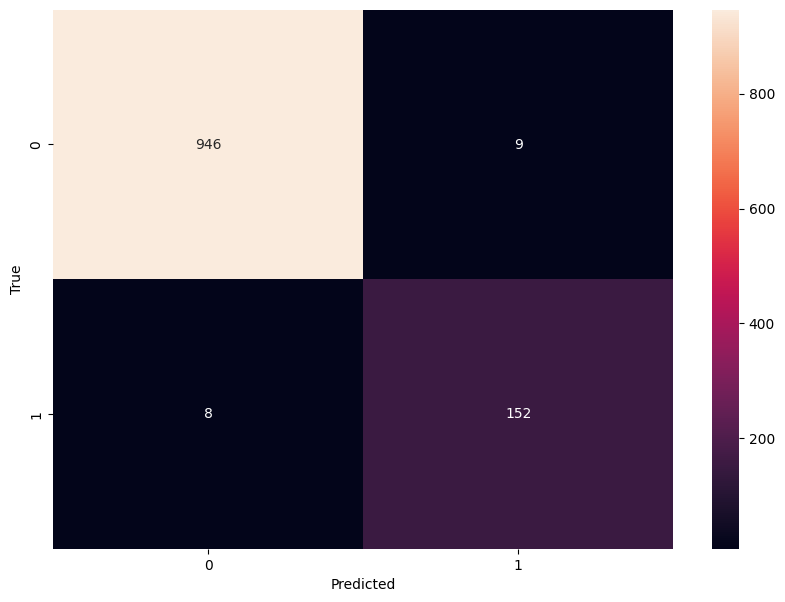

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [12]:
from sklearn.metrics import accuracy_score
accuracyNB = accuracy_score(y_test, y_pred)
accuracyNB

0.9847533632286996

# Training model using SVM support vector machine

In [13]:
from sklearn import svm
clf = svm.SVC()
spam_detect_model_svm = clf.fit(X_train, y_train)

y_pred=spam_detect_model_svm.predict(X_test)

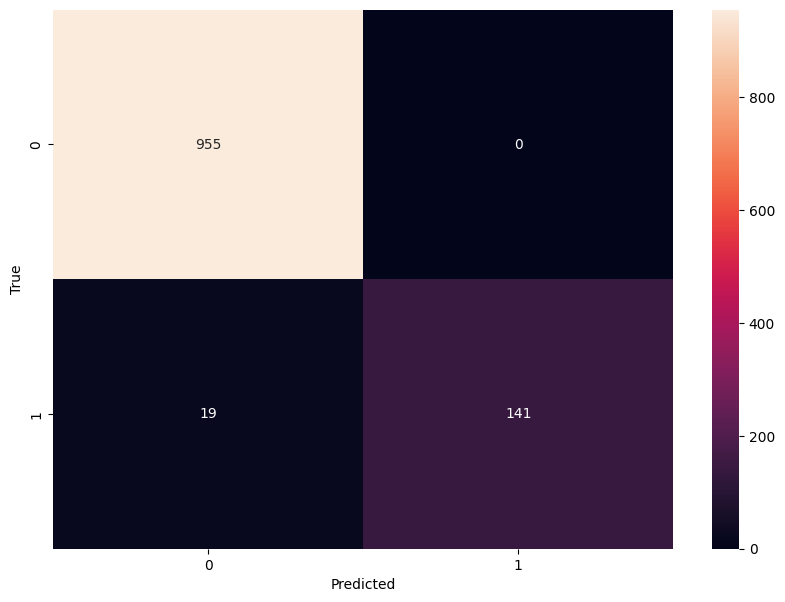

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
accuracysvm = accuracy_score(y_test, y_pred)
accuracysvm

0.9829596412556054

# Training model using logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(random_state=0)

spam_detect_model_LR = Lr.fit(X_train, y_train)

y_pred=spam_detect_model_LR.predict(X_test)

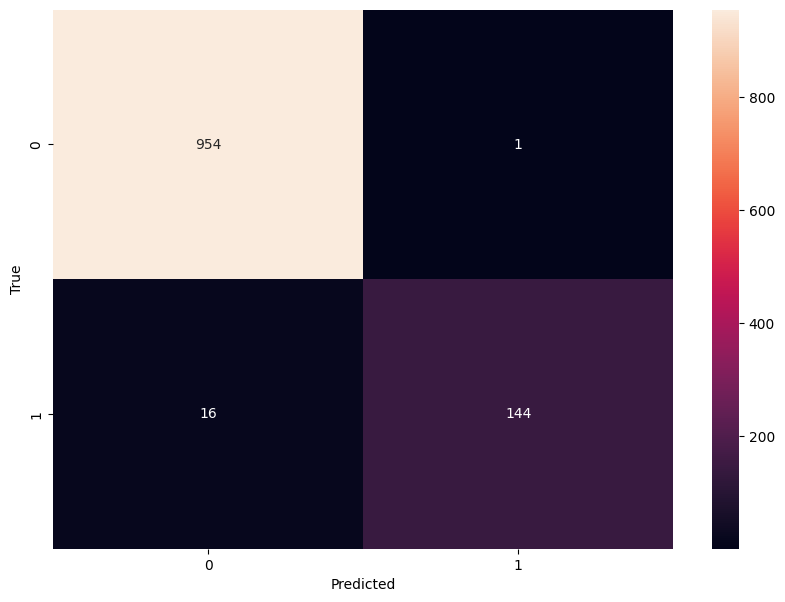

In [17]:
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
accuracyLR = accuracy_score(y_test, y_pred)
accuracyLR

0.9847533632286996

In [19]:
accuracy_scores = [accuracyNB,accuracysvm,accuracyLR]
accuracy_scores

[0.9847533632286996, 0.9829596412556054, 0.9847533632286996]

# Comparing accuracy scores of all the algorithms

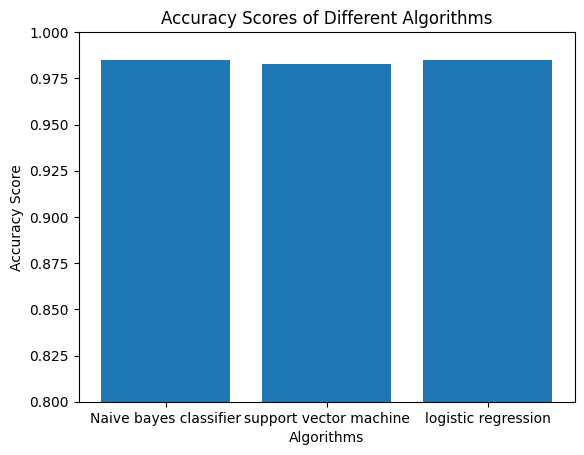

In [20]:
import matplotlib.pyplot as plt

# Corresponding algorithms
algorithms = ['Naive bayes classifier', 'support vector machine', 'logistic regression']

# Create bar plot
plt.bar(algorithms, accuracy_scores)
plt.title('Accuracy Scores of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.ylim([0.8, 1.0])  # Optional: you can set limits for y-axis
plt.show()
